# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier #2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier #3
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier #4
from sklearn.linear_model import LogisticRegression #1
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier #5
from sklearn.naive_bayes import GaussianNB #6
from sklearn.svm import SVC #7
from sklearn.metrics import accuracy_score

# Load Data

In [31]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# 1-Explore Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
nu=train.isnull().sum()
nu[nu>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

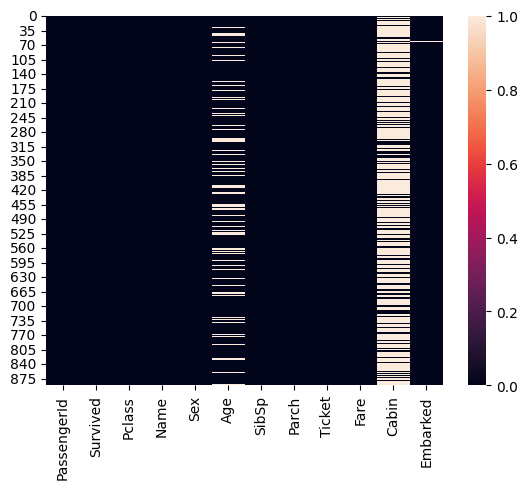

In [9]:
sns.heatmap(train.isnull())

# 2-Clean Data

In [10]:
def clean(d):
    d.drop(['Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
    d.Age.fillna(d.Age.median(),inplace=True)
    d.dropna(inplace=True)
    return d

In [32]:
clean(train)

/tmp/ipython-input-1233201634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d.Age.fillna(d.Age.median(),inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<Axes: >

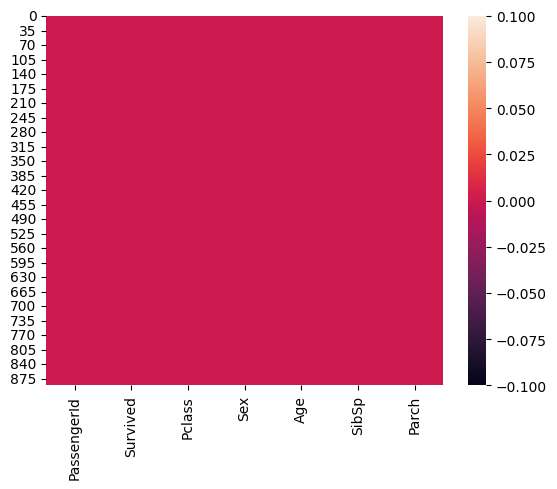

In [22]:
sns.heatmap(train.isnull())

In [33]:
clean(test)

/tmp/ipython-input-1233201634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d.Age.fillna(d.Age.median(),inplace=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


# 3-Data Analysis

In [24]:
train.Survived.value_counts()

,count
Survived,
0,549
1,342


In [25]:
train.Sex.value_counts()

,count
Sex,
male,577
female,314


In [28]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000


<Axes: >

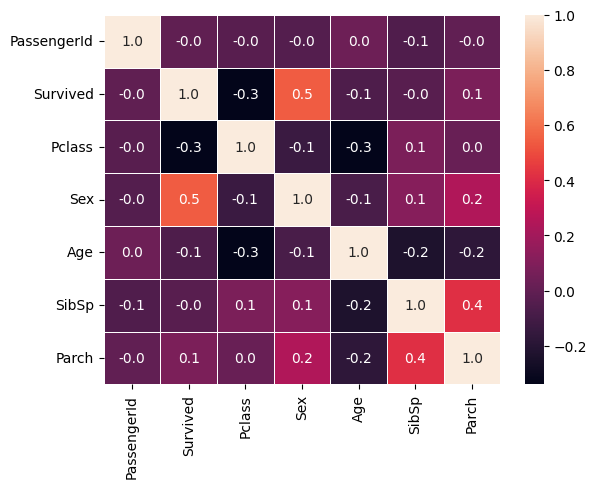

In [29]:
sns.heatmap(train.corr(),annot=True,fmt='.1f',linewidths=0.5)

<Axes: ylabel='count'>

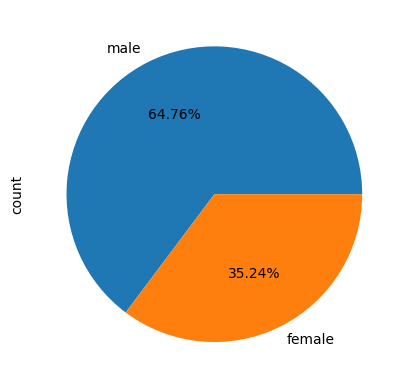

In [26]:
from enum import auto
train.Sex.value_counts().plot.pie(autopct='%.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

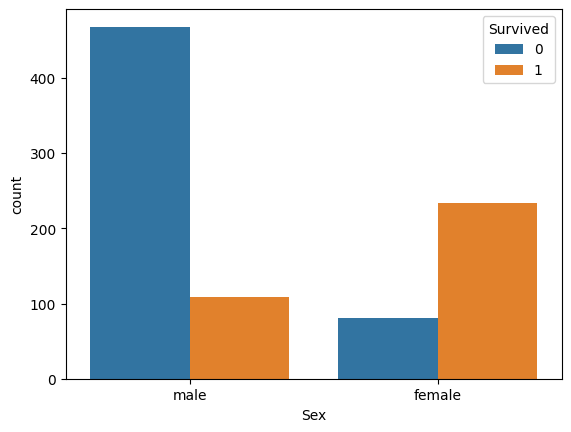

In [34]:
sns.countplot(data=train, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

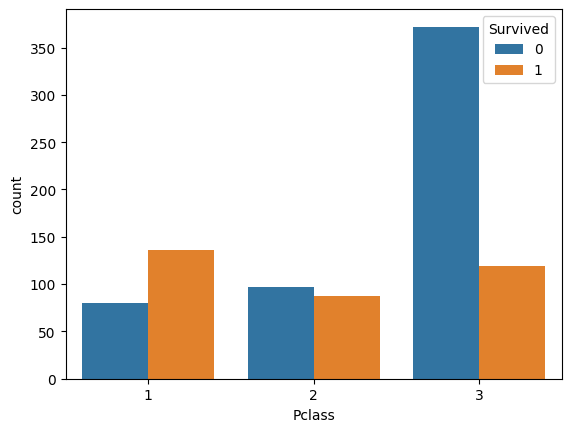

In [35]:
sns.countplot(data=train, x='Pclass', hue='Survived')


<Axes: xlabel='Age', ylabel='Count'>

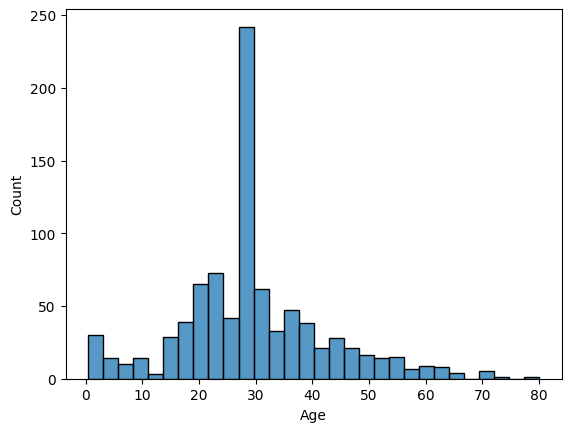

In [36]:
sns.histplot(data=train, x='Age')

# 4-Transform Data

In [37]:
#train.Sex=pd.get_dummies(train.Sex, drop_first=True).astype(int)
train.Sex.replace({'male':0,'female':1},inplace=True)
test.Sex.replace({'male':0,'female':1},inplace=True)

/tmp/ipython-input-2500069442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Sex.replace({'male':0,'female':1},inplace=True)
/tmp/ipython-input-2500069442.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Sex.replace({'male':0,'female':1},inplace=True)
/tmp/ipython-input-250006944

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [40]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0
414,1306,1,1,39.0,0,0
415,1307,3,0,38.5,0,0
416,1308,3,0,27.0,0,0


# 5-Creat Model

In [41]:
x=train.drop('Survived',axis=1)
y=train.Survived

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [43]:
accuracies=[]

In [44]:
def all(model):
  model.fit(x_train,y_train)
  pre=model.predict(x_test)
  accuracy=accuracy_score(pre,y_test)
  print('Accuracy = ',accuracy)
  accuracies.append(accuracy)


In [45]:
model1=LogisticRegression()
all(model1)

Accuracy =  0.8324022346368715


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
model2=RandomForestClassifier()
all(model2)

Accuracy =  0.7597765363128491


In [47]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy =  0.8324022346368715


In [48]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy =  0.7206703910614525


In [49]:
model5=KNeighborsClassifier()
all(model5)

Accuracy =  0.5698324022346368


In [50]:
model6=GaussianNB()
all(model6)

Accuracy =  0.8100558659217877


In [51]:
model7=SVC()
all(model7)

Accuracy =  0.5865921787709497


In [52]:
Algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [53]:
df=pd.DataFrame({'Algorithms':Algorithms,'Accuracy':accuracies})
df

,Algorithms,Accuracy
0,LogisticRegression,0.832402
1,RandomForestClassifier,0.759777
2,GradientBoostingClassifier,0.832402
3,DecisionTreeClassifier,0.720670
4,KNeighborsClassifier,0.569832
5,GaussianNB,0.810056
6,SVC,0.586592


In [54]:
modelx=RandomForestClassifier()
modelx.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
lpre=modelx.predict(test)

In [56]:
final=test.PassengerId

In [57]:
new_dataframe = pd.DataFrame({'PassengerId':final,'Survived' :lpre})

In [58]:
new_dataframe.to_csv('submission.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')